<div class="alert alert-info"> 

<font size="5"><b><p style="text-align: center;">СОСТАВЛЕНИЕ SQL-ЗАПРОСОВ К БАЗЕ ДАННЫХ STACKOVERFLOW</p></b></font>

**Целью настоящей работы является демонстрация изученных навыков составления аналитических запросов к базе данных StackOverflow ( https://stackoverflow.com/ ) - сервиса вопросов и ответов о программировании.  
Запросы, составляемые на языке SQL (PostgreSQL), в числе прочего должны будут использовать оконные функции.  
Всего нужно будет составить 20 запросов.**

**StackOverflow похож на социальную сеть — пользователи сервиса задают вопросы, отвечают на посты, оставляют комментарии и ставят оценки другим ответам.**

**Мы будем работать с версией базы, где хранятся данные о постах за 2008 год, но в таблицах имеется информацию и о более поздних оценках, которые эти посты получили.**

*В данных, которые мы будем использовать в проекте, упоминаются сервисы и компании, запрещённые в РФ.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Схема-данных" data-toc-modified-id="Схема-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Схема данных</a></span></li><li><span><a href="#Подключение-к-базе-данных" data-toc-modified-id="Подключение-к-базе-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подключение к базе данных</a></span></li><li><span><a href="#Задания" data-toc-modified-id="Задания-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задания</a></span><ul class="toc-item"><li><span><a href="#Задание-1" data-toc-modified-id="Задание-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Задание 1</a></span></li><li><span><a href="#Задание-2" data-toc-modified-id="Задание-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Задание 2</a></span></li><li><span><a href="#Задание-3" data-toc-modified-id="Задание-3-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Задание 3</a></span></li><li><span><a href="#Задание-4" data-toc-modified-id="Задание-4-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Задание 4</a></span></li><li><span><a href="#Задание-5" data-toc-modified-id="Задание-5-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Задание 5</a></span></li><li><span><a href="#Задание-6" data-toc-modified-id="Задание-6-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Задание 6</a></span></li><li><span><a href="#Задание-7" data-toc-modified-id="Задание-7-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Задание 7</a></span></li><li><span><a href="#Задание-8" data-toc-modified-id="Задание-8-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Задание 8</a></span></li><li><span><a href="#Задание-9" data-toc-modified-id="Задание-9-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Задание 9</a></span></li><li><span><a href="#Задание-10" data-toc-modified-id="Задание-10-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Задание 10</a></span></li><li><span><a href="#Задание-11" data-toc-modified-id="Задание-11-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Задание 11</a></span></li><li><span><a href="#Задание-12" data-toc-modified-id="Задание-12-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>Задание 12</a></span></li><li><span><a href="#Задание-13" data-toc-modified-id="Задание-13-3.13"><span class="toc-item-num">3.13&nbsp;&nbsp;</span>Задание 13</a></span></li><li><span><a href="#Задание-14" data-toc-modified-id="Задание-14-3.14"><span class="toc-item-num">3.14&nbsp;&nbsp;</span>Задание 14</a></span></li><li><span><a href="#Задание-15" data-toc-modified-id="Задание-15-3.15"><span class="toc-item-num">3.15&nbsp;&nbsp;</span>Задание 15</a></span></li><li><span><a href="#Задание-16" data-toc-modified-id="Задание-16-3.16"><span class="toc-item-num">3.16&nbsp;&nbsp;</span>Задание 16</a></span></li><li><span><a href="#Задание-17" data-toc-modified-id="Задание-17-3.17"><span class="toc-item-num">3.17&nbsp;&nbsp;</span>Задание 17</a></span></li><li><span><a href="#Задание-18" data-toc-modified-id="Задание-18-3.18"><span class="toc-item-num">3.18&nbsp;&nbsp;</span>Задание 18</a></span></li><li><span><a href="#Задание-19" data-toc-modified-id="Задание-19-3.19"><span class="toc-item-num">3.19&nbsp;&nbsp;</span>Задание 19</a></span></li><li><span><a href="#Задание-20" data-toc-modified-id="Задание-20-3.20"><span class="toc-item-num">3.20&nbsp;&nbsp;</span>Задание 20</a></span></li></ul></li></ul></div>

## Схема данных

In [1]:
#для начала импортируем библиотеки

import pandas as pd
from IPython.display import Image
from sqlalchemy import create_engine 

**В нашей работе мы будем использовать следующую схему данных:**

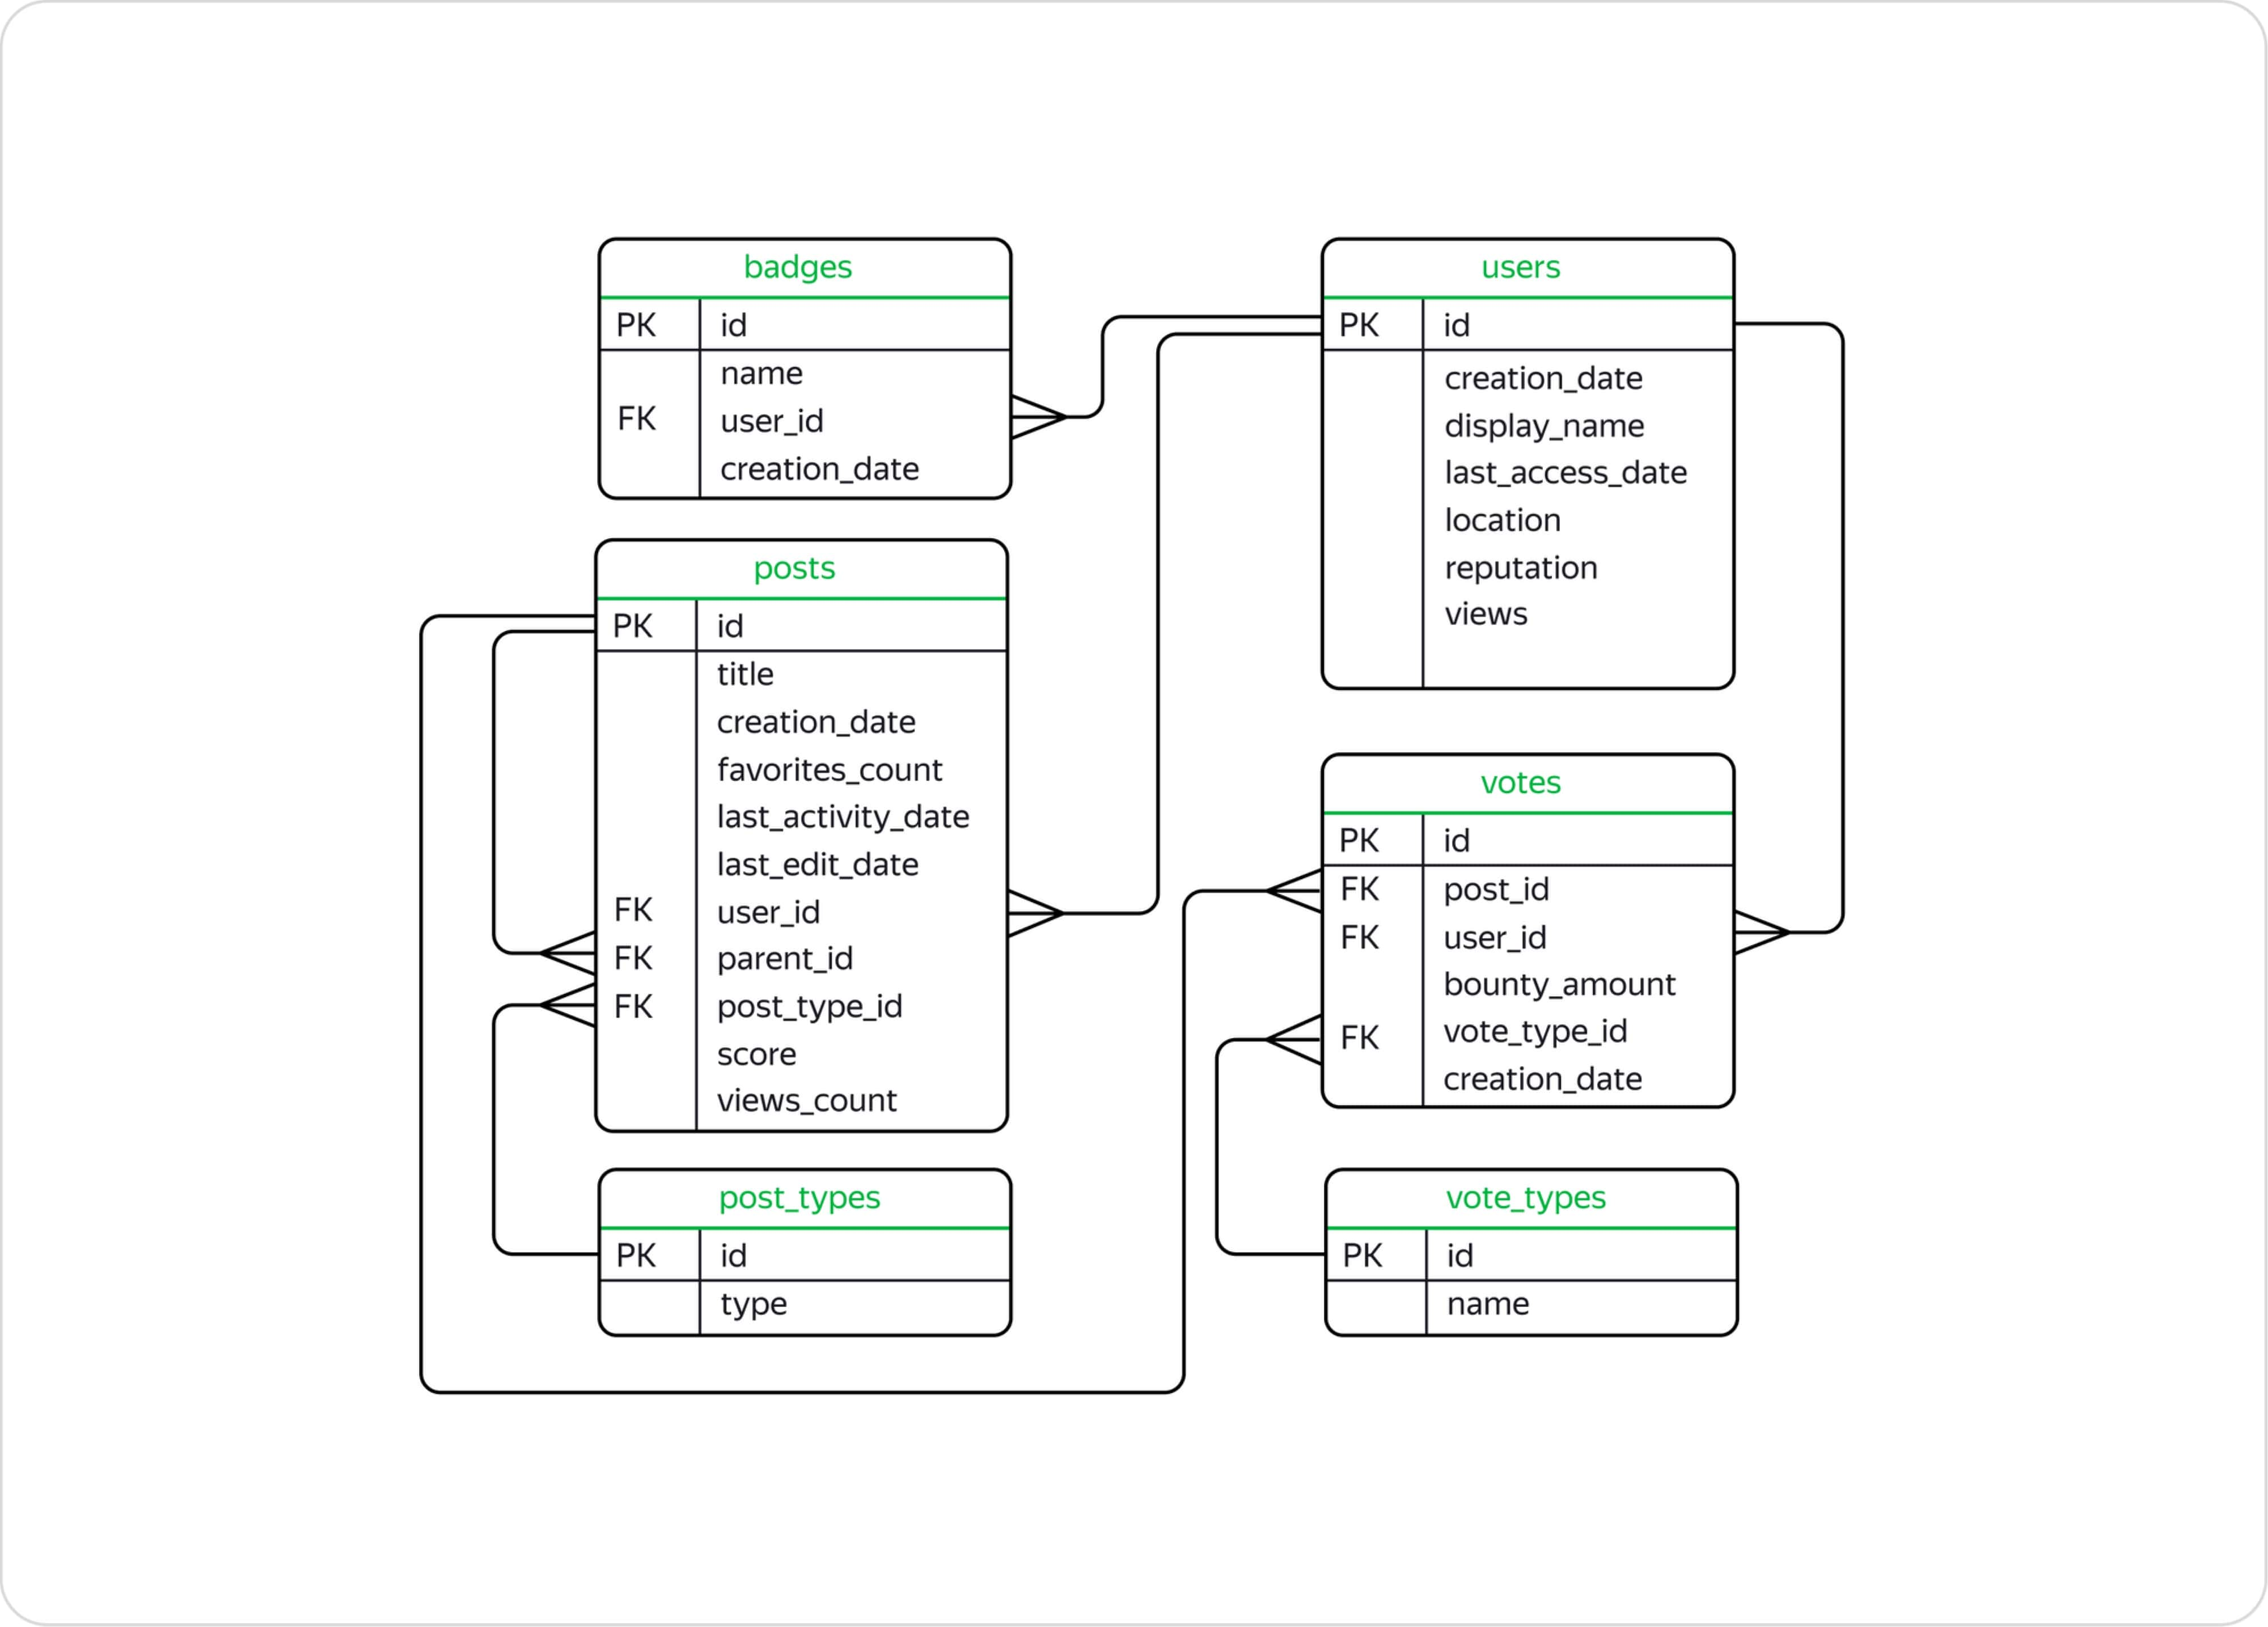

In [2]:
Image("D:\Datasets_for_Git\shema_sql.jpg", width=900, height=600)

## Подключение к базе данных

**Используем библиотеку sqlalchemy для подключения к базе данных:**

In [3]:
#задаём параметры для формирования строки подключения

db_config = {
    'user': # имя пользователя
    'pwd':  # пароль
    'host': # хост
    'port': # порт подключения
    'db':   # имя базы данных
}

In [4]:
#формируем данные для строки подключения

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

In [5]:
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [6]:
#напишем функцию для выполнения запросов, чтобы каждый раз не заполнять форму

def qw (query):
    return pd.io.sql.read_sql(query, con = engine)

**Для ознакомления, выведем первые строки всех таблицы из базы данных:**

In [7]:
#сформируем список таблиц

spisok=['stackoverflow.post_types', 'stackoverflow.posts', 'stackoverflow.users',
        'stackoverflow.vote_types', 'stackoverflow.votes']

In [8]:
#выведем циклом первые 5 строк каждой таблицы

for elem in spisok:
    display (f'Таблица {elem}:', qw(f'''select *
    from {elem}
    limit 5'''))
    print ('==================================================================')
    print()

'Таблица stackoverflow.post_types:'

,id,type
0,1,Question
1,2,Answer


'Таблица stackoverflow.posts:'

,id,title,creation_date,favorites_count,last_activity_date,last_edit_date,user_id,parent_id,post_type_id,score,views_count
0,4,Convert Decimal to Double?,2008-07-31 21:42:53,41,2018-07-02 17:55:27.247,2018-07-02 17:55:27,8,0,1,573,37080
1,6,Percentage width child element in absolutely p...,2008-07-31 22:08:09,10,2016-03-19 06:10:52.170,2016-03-19 06:05:48,9,0,1,256,16306
2,7,None,2008-07-31 22:17:58,0,2017-12-16 05:06:57.613,2017-12-16 05:06:58,9,4,2,401,0
3,9,How do I calculate someone's age in C#?,2008-07-31 23:41:00,399,2018-07-25 11:57:14.110,2018-04-21 17:48:14,1,0,1,1743,480476
4,11,Calculate relative time in C#,2008-07-31 23:55:38,529,2018-07-05 04:00:56.633,2017-06-04 15:51:20,1,0,1,1348,136033


'Таблица stackoverflow.users:'

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700


'Таблица stackoverflow.vote_types:'

,id,name
0,1,AcceptedByOriginator
1,2,UpMod
2,3,DownMod
3,4,Offensive
4,5,Favorite


'Таблица stackoverflow.votes:'

,id,post_id,user_id,bounty_amount,vote_type_id,creation_date
0,434364,146794,4918,None,5,2008-10-03
1,434366,135535,16511,None,3,2008-10-03
2,434372,162181,12818,None,1,2008-10-03
3,434380,21965,4002,None,1,2008-10-03
4,434401,165975,8161,None,2,2008-10-03


**Соединение с базой данных установлено, все данные выводятся корректно, можно приступать к основной части.**

## Задания

### Задание 1
**Найдите количество вопросов, которые набрали больше 300 очков или как минимум 100 раз были добавлены в «Закладки».**

In [9]:
qw('''
SELECT COUNT (*)
FROM stackoverflow.posts p
JOIN stackoverflow.post_types t
    ON p.post_type_id=t.id
WHERE favorites_count >= 100
    OR score > 300
    AND t.type='Question'
''')  

,count
0,1355


### Задание 2
**Сколько в среднем в день задавали вопросов с 1 по 18 ноября 2008 включительно? Результат округлите до целого числа.**

In [10]:
qw('''
SELECT ROUND (avg (cou))
FROM 
    (SELECT COUNT (*) AS cou
    FROM stackoverflow.posts p
    JOIN stackoverflow.post_types t
        ON p.post_type_id=t.id
    WHERE t.type='Question'
            AND CAST(p.creation_date AS date)
        BETWEEN '2008-11-01' AND '2008-11-18'
    GROUP BY CAST(p.creation_date AS date)) AS qwe 
''')

,round
0,383.0


### Задание 3
**Сколько пользователей получили значки сразу в день регистрации? Выведите количество уникальных пользователей.**

In [11]:
qw ('''
SELECT COUNT (DISTINCT b.user_id)
FROM stackoverflow.badges b
    JOIN stackoverflow.users u
        ON b.user_id = u.id
WHERE  CAST (b.creation_date AS DATE) = CAST (u.creation_date AS DATE)  
''')

,count
0,7047


### Задание 4
**Сколько уникальных постов пользователя с именем Joel Coehoorn получили хотя бы один голос?**

In [12]:
qw('''
SELECT COUNT (distinct p.id)
FROM stackoverflow.posts p
JOIN stackoverflow.users u
    ON p.user_id=u.id
JOIN stackoverflow.votes v
    ON p.id=v.post_id
WHERE display_name = 'Joel Coehoorn'
        AND v.id > 0
''')

,count
0,12


### Задание 5

**Выгрузите все поля таблицы vote_types. Добавьте к таблице поле rank, в которое войдут номера записей в обратном порядке. Таблица должна быть отсортирована по полю id.**

In [13]:
qw('''
SELECT *,
        ROW_NUMBER ()
    OVER (ORDER BY id DESC) AS rank
FROM stackoverflow.vote_types
ORDER BY rank DESC
''')

,id,name,rank
0,1,AcceptedByOriginator,15
1,2,UpMod,14
2,3,DownMod,13
3,4,Offensive,12
4,5,Favorite,11
5,6,Close,10
6,7,Reopen,9
7,8,BountyStart,8
8,9,BountyClose,7
9,10,Deletion,6


### Задание 6
**Отберите 10 пользователей, которые поставили больше всего голосов типа Close. Отобразите таблицу из двух полей: с идентификатором пользователя и количеством голосов. Отсортируйте данные сначала по убыванию количества голосов, потом по убыванию значения идентификатора пользователя.**

In [14]:
qw('''
SELECT DISTINCT u.id,
       COUNT (v.id) OVER (PARTITION BY u.id ) AS rank
FROM stackoverflow.users u
JOIN stackoverflow.votes v
    ON u.id=v.user_id
JOIN stackoverflow.vote_types vt
    ON v.vote_type_id=vt.id
WHERE vt.name = 'Close'
ORDER BY  rank DESC, u.id DESC
LIMIT 10
''')

,id,rank
0,20646,36
1,14728,36
2,27163,29
3,41158,24
4,24820,23
5,9345,23
6,3241,23
7,44330,20
8,38426,19
9,19074,19


### Задание 7
**Отберите 10 пользователей по количеству значков, полученных в период с 15 ноября по 15 декабря 2008 года включительно.
Отобразите несколько полей:**

    идентификатор пользователя;
    число значков;
    место в рейтинге — чем больше значков, тем выше рейтинг.

**Пользователям, которые набрали одинаковое количество значков, присвойте одно и то же место в рейтинге.
Отсортируйте записи по количеству значков по убыванию, а затем по возрастанию значения идентификатора пользователя.**

In [15]:
qw('''
WITH 
qwe AS (SELECT DISTINCT user_id AS users,
            COUNT(id) OVER (PARTITION BY user_id) AS cou
        FROM stackoverflow.badges
        WHERE CAST (creation_date AS date)
            BETWEEN '2008-11-15' AND '2008-12-15')
            
SELECT users,
       cou,
       DENSE_RANK() OVER (ORDER BY cou DESC)
FROM qwe
ORDER BY  cou DESC, users 
LIMIT 10
''')

,users,cou,dense_rank
0,22656,149,1
1,34509,45,2
2,1288,40,3
3,5190,31,4
4,13913,30,5
5,893,28,6
6,10661,28,6
7,33213,25,7
8,12950,23,8
9,25222,20,9


### Задание 8

**Сколько в среднем очков получает пост каждого пользователя?
Сформируйте таблицу из следующих полей:**

    заголовок поста;
    идентификатор пользователя;
    число очков поста;
    среднее число очков пользователя за пост, округлённое до целого числа.

**Не учитывайте посты без заголовка, а также те, что набрали ноль очков.**

In [16]:
qw ('''
SELECT title,
    user_id,
    score,
    ROUND(AVG(score) OVER (PARTITION BY user_id)) AS average
FROM stackoverflow.posts
WHERE title IS NOT NULL
        AND score <> 0
''')

,title,user_id,score,average
0,Diagnosing Deadlocks in SQL Server 2005,1,82,573.0
1,How do I calculate someone's age in C#?,1,1743,573.0
2,Why doesn't IE7 copy <pre><code> blocks to the...,1,37,573.0
3,Calculate relative time in C#,1,1348,573.0
4,Wrapping StopWatch timing with a delegate or l...,1,92,573.0
...,...,...,...,...
47349,Multi-lingual projects in Visual Studio,3742716,1,1.0
47350,Change datatype when importing Excel file into...,3930756,5,5.0
47351,How to host a Silverlight app in a Sharepoint ...,4020932,8,8.0
47352,Getting counts for a paged SQL search stored p...,5696608,2,2.0


### Задание 9
**Отобразите заголовки постов, которые были написаны пользователями, получившими более 1000 значков. Посты без заголовков не должны попасть в список.**

In [17]:
pd.set_option('display.max_colwidth', None)

qw('''
SELECT title
FROM stackoverflow.posts
WHERE user_id IN 
    (SELECT user_id
    FROM stackoverflow.badges
    GROUP BY user_id
    HAVING COUNT (id) > 1000)
        AND title IS NOT NULL 
''')

,title
0,What's the strangest corner case you've seen in C# or .NET?
1,What's the hardest or most misunderstood aspect of LINQ?
2,What are the correct version numbers for C#?
3,Project management to go with GitHub


### Задание 10
**Напишите запрос, который выгрузит данные о пользователях из США (англ. United States). Разделите пользователей на три группы в зависимости от количества просмотров их профилей:**

    пользователям с числом просмотров больше либо равным 350 присвойте группу 1;
    пользователям с числом просмотров меньше 350, но больше либо равно 100 — группу 2;
    пользователям с числом просмотров меньше 100 — группу 3.

**Отобразите в итоговой таблице идентификатор пользователя, количество просмотров профиля и группу. Пользователи с нулевым количеством просмотров не должны войти в итоговую таблицу.**

In [18]:
qw('''
SELECT id,
views,
CASE
    WHEN views >= 350 THEN 1
    WHEN views < 350 AND views >= 100 THEN 2
    ELSE 3
END
FROM stackoverflow.users
WHERE location = 'United States'
AND views > 0
''')

,id,views,case
0,43,394,1
1,45,1971,1
2,64,866,1
3,67,8848,1
4,73,169,2
...,...,...,...
1475,82153,14,3
1476,386195,107,2
1477,57381,71,3
1478,85197,98,3


### Задание 11
**Дополните предыдущий запрос. Отобразите лидеров каждой группы — пользователей, которые набрали максимальное число просмотров в своей группе. Выведите поля с идентификатором пользователя, группой и количеством просмотров.  
Отсортируйте таблицу по убыванию просмотров, а затем по возрастанию значения идентификатора.**

In [19]:
qw('''
WITH
qwe AS (select id,
        views,
        CASE 
            WHEN views >= 350 THEN 1
            WHEN views < 350  AND views >= 100 THEN 2
            ELSE 3
        END as grupp
        FROM stackoverflow.users
        WHERE location = 'United States'
        AND views > 0),
        
qwe1 AS (select id,
         views, grupp,
         MAX(views) OVER (PARTITION BY grupp) AS maxx
         FROM qwe)
         
SELECT id, grupp, views
FROM qwe1
WHERE views = maxx
ORDER BY views DESC, id
''')

,id,grupp,views
0,1228,1,58635
1,9585,2,349
2,15079,2,349
3,33437,2,349
4,3469,3,99
5,4829,3,99
6,22732,3,99


### Задание 12
**Посчитайте ежедневный прирост новых пользователей в ноябре 2008 года. Сформируйте таблицу с полями:**

    номер дня;
    число пользователей, зарегистрированных в этот день;
    сумму пользователей с накоплением.

In [20]:
pd.set_option('display.max_rows', 15)

qw('''
WITH
qwe AS (SELECT DISTINCT EXTRACT (day FROM CAST (creation_date AS TIMESTAMP)) AS day,
        COUNT(id) OVER (PARTITION BY EXTRACT (DAY FROM CAST (creation_date AS TIMESTAMP))) AS cnt
        FROM stackoverflow.users
        WHERE CAST (DATE_TRUNC ('month', creation_date) AS DATE) = '2008-11-01')
        
SELECT *,
SUM (cnt) OVER (ORDER BY day)
FROM qwe
''')

,day,cnt,sum
0,1.0,34,34.0
1,2.0,48,82.0
2,3.0,75,157.0
3,4.0,192,349.0
4,5.0,122,471.0
...,...,...,...
25,26.0,98,2204.0
26,27.0,71,2275.0
27,28.0,56,2331.0
28,29.0,44,2375.0


### Задание 13
**Для каждого пользователя, который написал хотя бы один пост, найдите интервал между регистрацией и временем создания первого поста. Отобразите:**

    идентификатор пользователя;
    разницу во времени между регистрацией и первым постом.

In [21]:
qw('''
WITH
qwe AS (SELECT DISTINCT u.id AS id,
        u.creation_date AS create_date,
        MIN (p.creation_date) OVER (PARTITION BY u.id) AS min_date
        FROM stackoverflow.users u
        JOIN stackoverflow.posts p
        ON u.id=p.user_id
        WHERE p.creation_date IS NOT NULL)
        
SELECT id,
min_date - create_date 
FROM qwe
''')

,id,?column?
0,1,0 days 09:18:29
1,2,0 days 14:37:03
2,3,3 days 16:17:09
3,4,15 days 05:44:22
4,5,1 days 14:57:51
...,...,...
18844,3644960,0 days 00:00:00
18845,3742716,66 days 21:15:48
18846,3930756,8 days 02:11:55
18847,4020932,47 days 18:30:34


### Задание 14
**Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.**

In [22]:
qw('''
SELECT CAST (DATE_TRUNC ('month', creation_date) AS DATE) AS month, SUM(views_count) AS sum
FROM stackoverflow.posts
GROUP BY  1
ORDER BY  2 DESC
''')

,month,sum
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


### Задание 15
**Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте.  
Для каждого имени пользователя выведите количество уникальных значений user_id.  
Отсортируйте результат по полю с именами в лексикографическом порядке.**

In [23]:
qw('''
SELECT u.display_name,
    COUNT (DISTINCT p.user_id)
FROM stackoverflow.users u
JOIN stackoverflow.posts p
    ON u.id=p.user_id
WHERE (p.creation_date::date BETWEEN u.creation_date::date 
    AND (u.creation_date::date + INTERVAL '1 month'))
    AND p.post_type_id IN (SELECT
                           id
                           FROM stackoverflow.post_types
                           WHERE type = 'Answer')
GROUP BY u.display_name
HAVING COUNT (p.id) > 100
ORDER BY u.display_name
''')

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
74,lomaxx,1
75,mattlant,1
76,paxdiablo,1
77,tvanfosson,1


### Задание 16
**Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года.  
Отсортируйте таблицу по значению месяца по убыванию.**

In [24]:
qw('''
SELECT DISTINCT cast (date_trunc ('month', creation_date) AS date) AS month, 
       count (id)
       OVER (PARTITION BY CAST (DATE_TRUNC ('month', creation_date) AS date)) AS count
FROM stackoverflow.posts
WHERE EXTRACT (YEAR FROM CAST (creation_date AS TIMESTAMP)) = '2008'
        AND user_id IN 
                      (SELECT u.id
                       FROM stackoverflow.users u
                       JOIN stackoverflow.posts p
                           ON u.id=p.user_id
                       WHERE u.creation_date::date
                           BETWEEN '2008-09-01'
                           AND '2008-09-30'
                           AND p.creation_date::date
                           BETWEEN '2008-12-01'
                           AND '2008-12-31')
ORDER BY  CAST (DATE_TRUNC ('month', creation_date) AS DATE) DESC
''')

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


### Задание 17
**Используя данные о постах, выведите несколько полей:**

    идентификатор пользователя, который написал пост;
    дата создания поста;
    количество просмотров у текущего поста;
    сумму просмотров постов автора с накоплением.

**Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.**

In [25]:
qw('''
SELECT DISTINCT user_id,
        creation_date,
        views_count,
        SUM (views_count) OVER (PARTITION BY user_id ORDER BY  creation_date)
FROM stackoverflow.posts
ORDER BY user_id
''')

,user_id,creation_date,views_count,sum
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


### Задание 18
**Сколько в среднем дней в период с 1 по 7 декабря 2008 года включительно пользователи взаимодействовали с платформой?  
Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост.  
Нужно получить одно целое число — не забудьте округлить результат.**

In [26]:
qw('''
WITH
qwe AS (SELECT DISTINCT user_id as users,
        COUNT (last_activity_date) OVER (PARTITION BY user_id) AS cou
        FROM stackoverflow.posts
        WHERE last_activity_date::date BETWEEN '2008-12-1' AND '2008-12-7')
        
SELECT
floor (AVG (cou))
FROM qwe
''')

,floor
0,2.0


### Задание 19
**На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:**

    номер месяца;
    количество постов за месяц;
    процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

**Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.  
Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип numeric.**

In [27]:
qw('''
WITH
qwe AS (SELECT DISTINCT EXTRACT (month FROM CAST (creation_date AS TIMESTAMP)) AS month,
        COUNT (id) OVER (PARTITION BY EXTRACT (month FROM CAST (creation_date AS TIMESTAMP))) AS count
        FROM stackoverflow.posts
        WHERE creation_date::date BETWEEN '2008-09-01' AND '2008-12-31')

SELECT month,
count,
ROUND (((count::numeric / LAG(count) OVER (ORDER BY month)) - 1) * 100, 2) AS anti_growth
FROM qwe
''')

,month,count,anti_growth
0,9.0,70371,NaN
1,10.0,63102,-10.33
2,11.0,46975,-25.56
3,12.0,44592,-5.07


### Задание 20
**Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:**

    номер недели;
    дата и время последнего поста, опубликованного на этой неделе.

In [28]:
qw('''
SELECT DISTINCT EXTRACT (week FROM CAST (creation_date AS TIMESTAMP)) AS week,
last_value (creation_date) OVER (PARTITION BY EXTRACT (week FROM CAST (creation_date as timestamp)) 
    ORDER BY creation_date  ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)
FROM stackoverflow.posts
WHERE user_id = (SELECT u.id
                 FROM stackoverflow.users u
                 JOIN stackoverflow.posts p
                     ON u.id=p.user_id
                 GROUP BY u.id
                 ORDER BY COUNT (p.id) DESC
                 LIMIT 1)
AND creation_date::date BETWEEN '2008-10-01' AND '2008-10-31'
''')

,week,last_value
0,40.0,2008-10-05 09:00:58
1,41.0,2008-10-12 21:22:23
2,42.0,2008-10-19 06:49:30
3,43.0,2008-10-26 21:44:36
4,44.0,2008-10-31 22:16:01


<div class="alert alert-info">
    
**По итогам выполненной работы можно отметить, что подключение к базе данных посредством Python установить удалось, все задачи выполнены в полном объёме, с использованием оконных функций (в тех местах, где это было уместным).**